# **Task 3**
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographical and geographical data

## **Introduction**

The purpose of this task is to build a machine learning model that predicts whether a customer will subscribe to a term deposit. For this project, I am using the Bank Marketing Dataset from the UCI Repository, which contains demographic, socioeconomic, and campaign-related information about clients. By cleaning, analyzing, and modeling this data, I aim to uncover key factors influencing customer decisions and evaluate the performance of a Decision Tree Classifier.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\SoumenD\Downloads\bank-additional-full.csv", sep=";")

## **Data Cleaning**


In [3]:
# Rename columns for better clarity
df = df.rename(columns={
    "y": "subscribed_term_deposit",   # target column
    "default": "credit_in_default",   # has credit in default
})
df.head()

,age,job,marital,education,credit_in_default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      41188 non-null  int64  
 1   job                      41188 non-null  object 
 2   marital                  41188 non-null  object 
 3   education                41188 non-null  object 
 4   credit_in_default        41188 non-null  object 
 5   housing                  41188 non-null  object 
 6   loan                     41188 non-null  object 
 7   contact                  41188 non-null  object 
 8   month                    41188 non-null  object 
 9   day_of_week              41188 non-null  object 
 10  duration                 41188 non-null  int64  
 11  campaign                 41188 non-null  int64  
 12  pdays                    41188 non-null  int64  
 13  previous                 41188 non-null  int64  
 14  poutcome              

In [ ]:
# Replace 'unknown' with NaN
df.replace("unknown", pd.NA, inplace=True)

# Drop rows with missing target
df = df.dropna(subset=["subscribed_term_deposit"])

# Convert categorical variables
df_encoded = pd.get_dummies(df.drop("subscribed_term_deposit", axis=1))
df_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Encode target
df_encoded["subscribed_term_deposit"] = df["subscribed_term_deposit"].map({"no": 0, "yes": 1})

## **Model Creation**

In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X = df_encoded.drop("subscribed_term_deposit", axis=1)
y = df_encoded["subscribed_term_deposit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Model Creation

from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Train
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Evaluate the model

from sklearn.metrics import classification_report, accuracy_score

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8971837824714737
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7310
           1       0.55      0.51      0.53       928

    accuracy                           0.90      8238
   macro avg       0.74      0.73      0.74      8238
weighted avg       0.89      0.90      0.90      8238



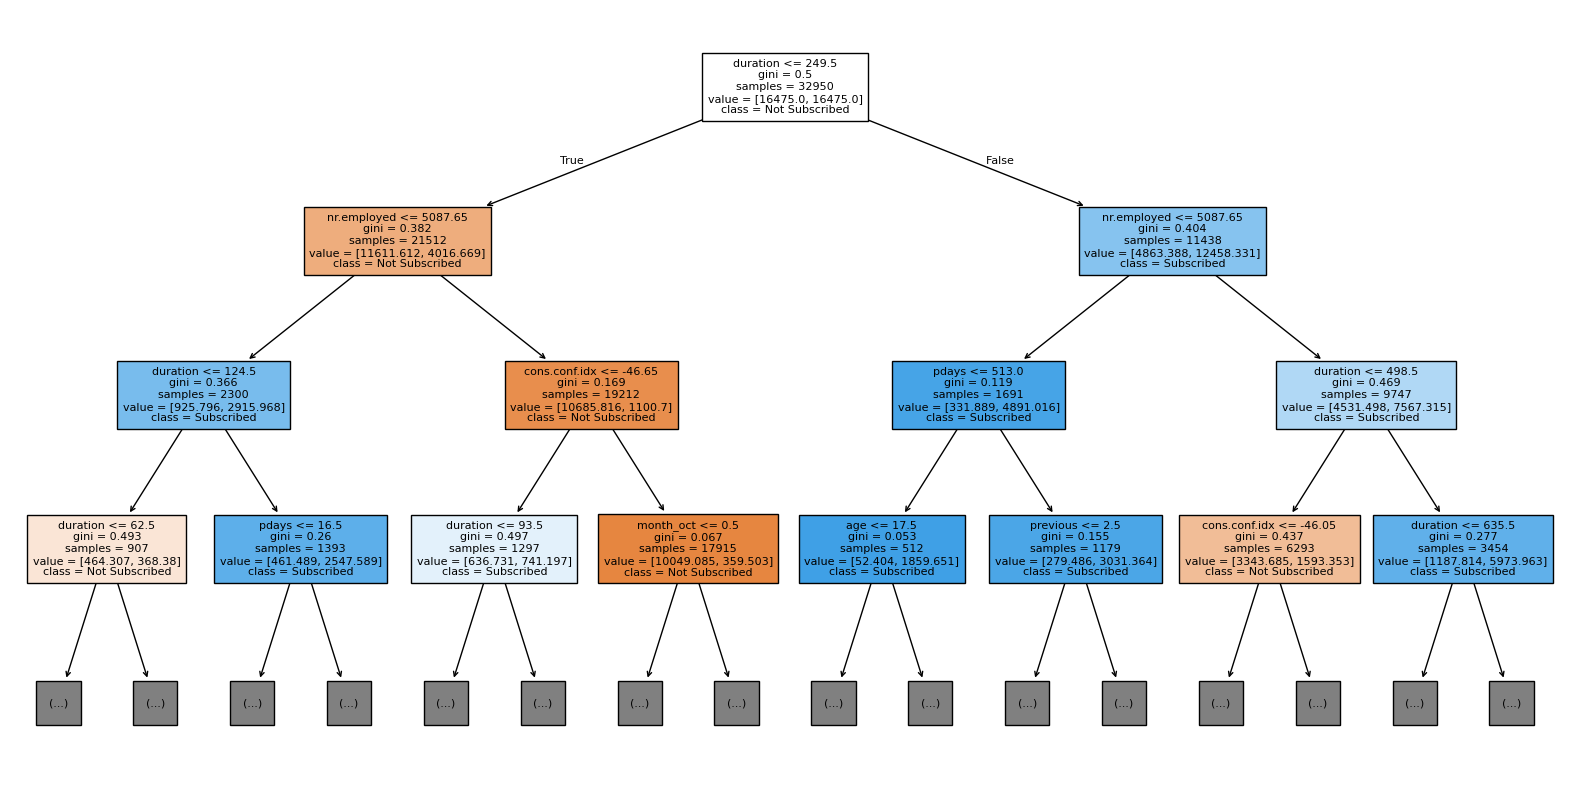

In [ ]:
# Visualize the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Not Subscribed", "Subscribed"], filled=True, max_depth=3, fontsize=8)
plt.show()


The decision tree helps us understand which factors most strongly influence whether a customer subscribes to a term deposit.

**1. Starting Point (Root Node)**
- The very first split is based on call duration.
- If the call is very short (≤ ~250 seconds), the model tends to predict that the customer will not subscribe.
- If the call lasts longer, the chances of subscribing increase significantly.

👉 This tells us that the length of engagement during the call is the single most important factor.

**2. Next Layer of Decisions**

- For short calls (≤ 250s), the tree looks at employment duration (nr.employed) and consumer confidence index.
- Customers contacted in times of lower employment stability or low consumer confidence are less likely to subscribe.
- For longer calls (> 250s), the tree again checks employment status. If employment is relatively stable, and the call lasts longer, the likelihood of subscription goes up.

**3. Deeper Insights**
Previous campaign contacts (pdays, previous) matter:

- If a customer was contacted recently and often, it affects their decision.
- Month of contact (e.g., October) also plays a role. Certain months may have higher or lower success rates.


🤔 Overall Message

The tree highlights that call duration is by far the strongest predictor.

After that, economic context (employment, consumer confidence) and customer history (previous contacts, timing of contact) shape the outcome.